In [ ]:
# Step 1: Importing Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import KNNImputer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import joblib

In [ ]:
# Step 2: Load the Dataset
df_og = pd.read_csv("/content/one_hot.csv")

In [ ]:
df_og.head()

,Name,# of Positions,Degree,Course,College,CGPA,HSC,SSC,Additional Info,# of tech skills,...,Public Relations,Public Speaking,Recruitment,Report Writing,Risk Management,Sales,Strategic Planning,Team Building,Time Management,Vendor Management
0,Vaishnavi Arolkar,5,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.77,NaN,NaN,"{'Key Values': {'cgpa': '8.77', 'skills': 'Tim...",13,...,0,0,0,0,0,0,0,0,1,0
1,Kundan Choudhary,0,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.20,NaN,NaN,"{'Key Values': {}, 'Languages': [], 'Certifica...",3,...,0,0,0,0,0,1,0,0,0,0
2,Vikram Choudhary,2,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.05,NaN,NaN,"{'Key Values': {'cgpa': '7.05'}, 'Languages': ...",11,...,0,0,0,0,0,0,0,0,0,0
3,Anushri Deshmukh,6,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.25,NaN,NaN,"{'Key Values': {'skills': 'Python, Java, HTML,...",11,...,0,0,0,0,0,0,0,0,1,0
4,Raj Gandhi,3,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.75,NaN,NaN,"{'Key Values': {'skills': 'OOPs,'}, 'Languages...",6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Step 3: Data Preprocessing
# Impute missing values for CGPA
imputer = KNNImputer(n_neighbors=5)
df_og['CGPA'] = imputer.fit_transform(df_og[['CGPA']])

In [ ]:
df_og.head()

,Name,# of Positions,Degree,Course,College,CGPA,HSC,SSC,Additional Info,# of tech skills,...,Public Relations,Public Speaking,Recruitment,Report Writing,Risk Management,Sales,Strategic Planning,Team Building,Time Management,Vendor Management
0,Vaishnavi Arolkar,5,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.77,NaN,NaN,"{'Key Values': {'cgpa': '8.77', 'skills': 'Tim...",13,...,0,0,0,0,0,0,0,0,1,0
1,Kundan Choudhary,0,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.20,NaN,NaN,"{'Key Values': {}, 'Languages': [], 'Certifica...",3,...,0,0,0,0,0,1,0,0,0,0
2,Vikram Choudhary,2,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.05,NaN,NaN,"{'Key Values': {'cgpa': '7.05'}, 'Languages': ...",11,...,0,0,0,0,0,0,0,0,0,0
3,Anushri Deshmukh,6,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,8.25,NaN,NaN,"{'Key Values': {'skills': 'Python, Java, HTML,...",11,...,0,0,0,0,0,0,0,0,1,0
4,Raj Gandhi,3,Bachelor of Technology,Electronics Engineering,Sardar Patel Institute of Technology,7.75,NaN,NaN,"{'Key Values': {'skills': 'OOPs,'}, 'Languages...",6,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Drop the 'College' column as it contains the same value for all rows
df_og = df_og.drop(['College'], axis=1)

In [ ]:
# One-hot encode categorical features
columns_to_encode = ['Degree', 'Course']
df_og = pd.get_dummies(df_og, columns=columns_to_encode, drop_first=False)

In [ ]:
df_og.head()

,Name,# of Positions,CGPA,HSC,SSC,Additional Info,# of tech skills,# of non tech skills,Role,Company,...,Sales,Strategic Planning,Team Building,Time Management,Vendor Management,Degree_Bachelor of Technology,Course_Computer Engineering,Course_Computer Networks,Course_Computer Science and Engineering,Course_Electronics Engineering
0,Vaishnavi Arolkar,5,8.77,NaN,NaN,"{'Key Values': {'cgpa': '8.77', 'skills': 'Tim...",13,4,SDE,Citius Tech,...,0,0,0,1,0,True,False,False,False,True
1,Kundan Choudhary,0,7.20,NaN,NaN,"{'Key Values': {}, 'Languages': [], 'Certifica...",3,1,SDE,Barclays,...,1,0,0,0,0,True,False,False,False,True
2,Vikram Choudhary,2,7.05,NaN,NaN,"{'Key Values': {'cgpa': '7.05'}, 'Languages': ...",11,0,Analyst,KPMG,...,0,0,0,0,0,True,False,False,False,True
3,Anushri Deshmukh,6,8.25,NaN,NaN,"{'Key Values': {'skills': 'Python, Java, HTML,...",11,4,Associate Consultant,Oracle,...,0,0,0,1,0,True,False,False,False,True
4,Raj Gandhi,3,7.75,NaN,NaN,"{'Key Values': {'skills': 'OOPs,'}, 'Languages...",6,2,SDE,BNP Paribas CIB,...,0,0,0,0,0,True,False,False,False,True


In [ ]:
# Drop unnecessary columns
df_og = df_og.drop(['HSC', 'SSC', 'Additional Info'], axis=1)

In [ ]:
# Keep the 'Name' column for the final predictions
df = df_og.drop(['Name'], axis=1)

In [ ]:
# Duplicate the data for augmentation
df_copy = df.copy()
df = pd.concat([df, df_copy], ignore_index=True)

In [ ]:
# Step 4: Splitting data for Role and Company prediction
df_role = df.copy()
df_role.dropna(subset=['Role'], inplace=True)
df_company = df.copy()
df_company.dropna(subset=['Company'], inplace=True)

In [ ]:
# X and Y for role prediction
X_role = df_role.drop(['Role', 'Company'], axis=1)
Y_role = df_role['Role']

In [ ]:
# X and Y for company prediction
X_company = df_company.drop(['Role', 'Company'], axis=1)
Y_company = df_company['Company']

In [ ]:
# Step 5: One-Hot Encoding the target variables
ohe_role = OneHotEncoder(sparse_output=False)
Y_role_encoded = ohe_role.fit_transform(df_role[['Role']])

ohe_company = OneHotEncoder(sparse_output=False)
Y_company_encoded = ohe_company.fit_transform(df_company[['Company']])

In [ ]:
Y_role_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
Y_company_encoded

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
# Step 6: Train-test split
X_role_train, X_role_test, Y_role_train, Y_role_test = train_test_split(X_role, Y_role_encoded, test_size=0.2, random_state=42)
X_company_train, X_company_test, Y_company_train, Y_company_test = train_test_split(X_company, Y_company_encoded, test_size=0.2, random_state=42)

In [ ]:
# Step 7: Data Scaling
scaler = StandardScaler()
X_role_train = scaler.fit_transform(X_role_train)
X_role_test = scaler.transform(X_role_test)
X_company_train = scaler.fit_transform(X_company_train)
X_company_test = scaler.transform(X_company_test)

In [ ]:
# Step 8: Model Training using SVM
role_svm = OneVsRestClassifier(SVC(kernel='linear', probability=True))
company_svm = OneVsRestClassifier(SVC(kernel='linear', probability=True))

In [ ]:
# Train the SVM models
role_svm.fit(X_role_train, Y_role_train)
company_svm.fit(X_company_train, Y_company_train)

/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 7 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 9 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 11 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 27 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 26 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 31 is present in all training examples.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/multiclass.py:87: UserWarning: Label not 51 is present in all training example

OneVsRestClassifier(estimator=SVC(kernel='linear', probability=True))

In [ ]:
# Save the models and encoders for later use
joblib.dump(role_svm, 'role_svm_model.pkl')
joblib.dump(company_svm, 'company_svm_model.pkl')
joblib.dump(ohe_role, 'ohe_role.pkl')
joblib.dump(ohe_company, 'ohe_company.pkl')

['ohe_company.pkl']

In [ ]:
# Step 9: Model Evaluation (Role Prediction)
role_predictions = role_svm.predict(X_role_test)
role_probabilities = role_svm.predict_proba(X_role_test)
role_accuracy = accuracy_score(np.argmax(Y_role_test, axis=1), np.argmax(role_predictions, axis=1))

In [ ]:
print(f"Role Prediction Accuracy: {role_accuracy}")

Role Prediction Accuracy: 0.6976744186046512


In [ ]:
role_conf_matrix = confusion_matrix(np.argmax(Y_role_test, axis=1), np.argmax(role_predictions, axis=1))
print(f"Role Confusion Matrix:\n{role_conf_matrix}")

Role Confusion Matrix:
[[4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0]
 [2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0]
 [0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0

In [ ]:
role_class_report = classification_report(np.argmax(Y_role_test, axis=1), np.argmax(role_predictions, axis=1))
print(f"Role Classification Report:\n{role_class_report}")

Role Classification Report:
              precision    recall  f1-score   support

           0       0.44      1.00      0.62         4
           1       1.00      0.50      0.67         2
           3       1.00      1.00      1.00         1
           4       0.33      1.00      0.50         1
           6       1.00      1.00      1.00         3
           7       0.00      0.00      0.00         2
           8       1.00      1.00      1.00         1
           9       0.00      0.00      0.00         2
          11       0.00      0.00      0.00         2
          12       1.00      1.00      1.00         1
          15       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         1
          18       1.00      1.00      1.00         1
          19       0.00      0.00      0.00         0
          20       0.00      0.00      0.00         2
          27       0.00      0.00      0.00         2
          28       0.00      0.00      0.00         0

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

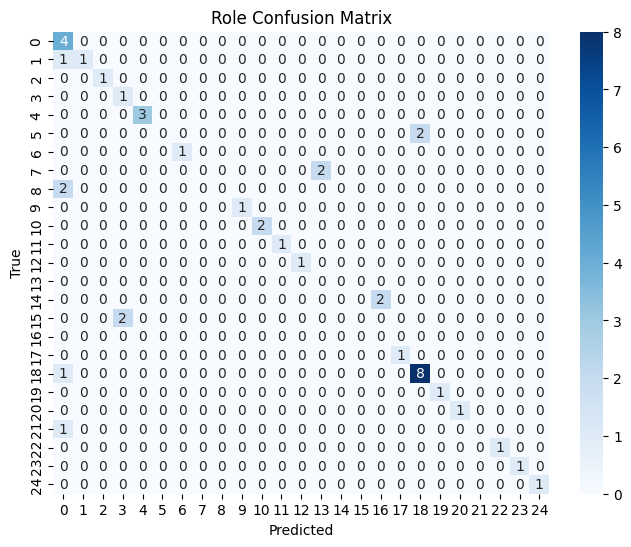

In [ ]:
# Visualize Role Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(role_conf_matrix, annot=True, cmap='Blues', fmt='d')
plt.title('Role Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Step 10: Model Evaluation (Company Prediction)
company_predictions = company_svm.predict(X_company_test)
company_probabilities = company_svm.predict_proba(X_company_test)
company_accuracy = accuracy_score(np.argmax(Y_company_test, axis=1), np.argmax(company_predictions, axis=1))

In [ ]:
print(f"Company Prediction Accuracy: {company_accuracy}")

Company Prediction Accuracy: 0.813953488372093


In [ ]:
company_conf_matrix = confusion_matrix(np.argmax(Y_company_test, axis=1), np.argmax(company_predictions, axis=1))
print(f"Company Confusion Matrix:\n{company_conf_matrix}")

Company Confusion Matrix:
[[1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 2 ... 0 0 0]
 [0 0 0 ... 0 1 0]
 [0 0 0 ... 0 0 1]]


In [ ]:
company_class_report = classification_report(np.argmax(Y_company_test, axis=1), np.argmax(company_predictions, axis=1))
print(f"Company Classification Report:\n{company_class_report}")

Company Classification Report:
              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           6       1.00      1.00      1.00         1
           7       1.00      1.00      1.00         2
           8       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      0.50      0.67         2
          15       1.00      1.00      1.00         1
          16       1.00      1.00      1.00         1
          17       1.00      1.00      1.00         2
          20       1.00      1.00      1.00         1
          22       1.00      1.00      1.00         1
          24       1.00      1.00      1.00         1
          25       1.00      1.00      1.00         1
          26       0.00      0.00      0.00         2
          27       1.00      1.00      1.00       

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

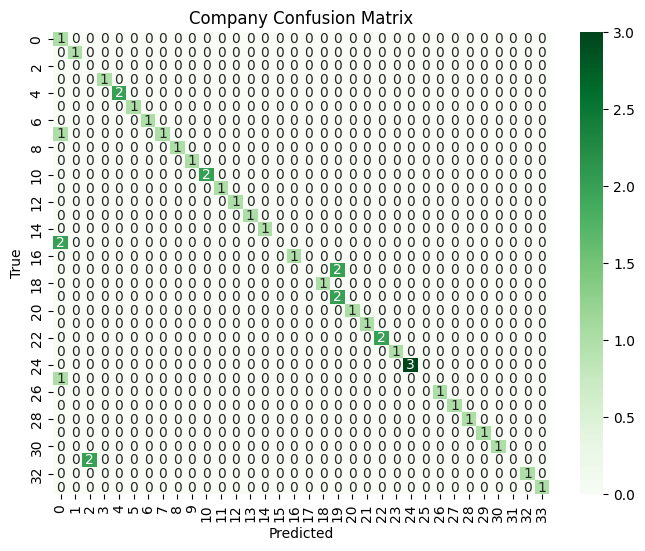

In [ ]:
# Visualize Company Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(company_conf_matrix, annot=True, cmap='Greens', fmt='d')
plt.title('Company Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
# Step 12: Model Output Based on Name
def preprocess_input(df, name):
    data = df[df['Name'] == name]
    if data.empty:
        raise ValueError(f"No data found for the name: {name}")
    X_data = data.drop(['Name', 'Role', 'Company'], axis=1)
    return scaler.transform(X_data)

In [ ]:
def get_top_n_predictions(predictions, target_names, top_n=5):
    probs = np.squeeze(predictions)
    top_indices = np.argsort(probs)[-top_n:][::-1]
    top_probs = probs[top_indices]
    top_names = np.array(target_names)[top_indices]
    return list(zip(top_names, top_probs))

In [ ]:
def predict_for_name(df, name, role_model, company_model, ohe_role, ohe_company, top_n=5):
    X_data = preprocess_input(df, name)
    role_predictions = role_model.predict_proba(X_data)
    company_predictions = company_model.predict_proba(X_data)

    target_names_role = list(ohe_role.categories_[0])
    target_names_company = list(ohe_company.categories_[0])

    top_roles = get_top_n_predictions(role_predictions, target_names_role, top_n)
    top_companies = get_top_n_predictions(company_predictions, target_names_company, top_n)

    return top_roles, top_companies

In [ ]:
# Example Usage
name = "Basuri Bhujade"
top_roles, top_companies = predict_for_name(df_og, name, role_svm, company_svm, ohe_role, ohe_company)

print(f"Top 5 Roles for {name}:")
for role, prob in top_roles:
    print(f"Role: {role}, Probability: {prob:.4f}")

print()
print(f"Top 5 Companies for {name}:")
for company, prob in top_companies:
    print(f"Company: {company}, Probability: {prob:.4f}")


Top 5 Roles for Basuri Bhujade:
Role: Assistant Product Manager, Probability: 0.5924
Role: Analyst, Probability: 0.0784
Role: Corporate Investment Banking (CIB), Probability: 0.0622
Role: Business Analyst, Probability: 0.0579
Role: Associate Consultant , Probability: 0.0397

Top 5 Companies for Basuri Bhujade:
Company: WorkIndia , Probability: 0.4611
Company: JPMC, Probability: 0.0702
Company: Oracle, Probability: 0.0595
Company: KPMG, Probability: 0.0554
Company: Barclays , Probability: 0.0419


In [ ]:
def predict_combined(name, top_n):
    top_roles, top_companies = predict_for_name(df_og, name, role_svm, company_svm, ohe_role, ohe_company)

    # Multiply Role and Company Probabilities
    combined_predictions = []
    for role, role_prob in top_roles:
        for company, company_prob in top_companies:
            combined_prob = role_prob * company_prob  # Multiply probabilities
            combined_predictions.append((role, company, combined_prob))

    # Sort combined predictions by probability in descending order
    combined_predictions.sort(key=lambda x: x[2], reverse=True)

    return combined_predictions[:top_n]

In [ ]:
# Example usage:
name = "Basuri Bhujade"  # Replace with an actual name from your dataset
try:
    top_predictions = predict_combined(name, top_n=5)

    print(f"\nTop 5 Predicted Roles and Companies with Multiplied Probabilities for {name}:")
    idx = 1
    for role, company, prob in top_predictions:
        print(f"{idx}) {role}, {company}, Probability: {prob:.4f}")
        idx += 1

except ValueError as e:
    print(e)


Top 5 Predicted Roles and Companies with Multiplied Probabilities for Basuri Bhujade:
1) Assistant Product Manager, WorkIndia , Probability: 0.2732
2) Assistant Product Manager, JPMC, Probability: 0.0416
3) Analyst, WorkIndia , Probability: 0.0362
4) Assistant Product Manager, Oracle, Probability: 0.0352
5) Assistant Product Manager, KPMG, Probability: 0.0328
